<img src="https://github.com/OpenMined/design-assets/raw/master/logos/OM/horizontal-primary-light.png" alt="he-black-box" width="600"/>


# Secure Multi Party Computation: Data Scientist
## Private Inference Image Evaluation


Welcome!
This tutorial will show you how to evaluate Encrypted images using Duet and SyMPC. This notebook illustrates the Data Scientist view on the operations.

## 0 - Libraries

Let's import the main libraries

In [1]:
import torch
import torch.nn.functional as F
from torch import nn
import torchvision
from torchvision import transforms

import syft as sy  # core library for remote execution
sy.load("sympc")

## 1 - Duet Server and connection to Data Owners

In this step let's launch a Duet server and connect to the Data Owners

### 1.1 -  Connect to the Data Owners

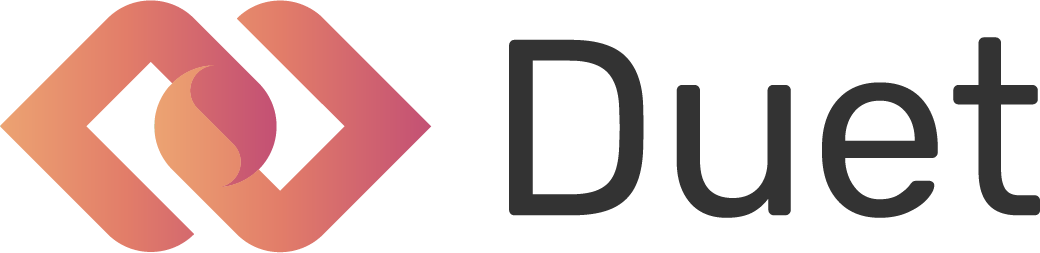

🎤  🎸  ♪♪♪ Joining Duet ♫♫♫  🎻  🎹

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ > Use at your own risk.


    > ❤️ Love Duet? Please consider supporting our community!
    > https://github.com/sponsors/OpenMined

♫♫♫ > Punching through firewall to OpenGrid Network Node at:
♫♫♫ > http://ec2-18-216-8-163.us-east-2.compute.amazonaws.com:5000
♫♫♫ >
♫♫♫ > ...waiting for response from OpenGrid Network... 
♫♫♫ > DONE!

♫♫♫ > CONNECTED!


In [2]:
duet_p1 = sy.join_duet(loopback=True)

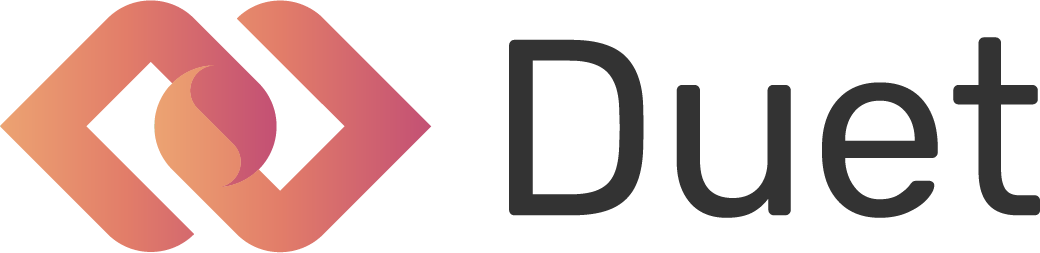

🎤  🎸  ♪♪♪ Joining Duet ♫♫♫  🎻  🎹

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ > Use at your own risk.


    > ❤️ Love Duet? Please consider supporting our community!
    > https://github.com/sponsors/OpenMined

♫♫♫ > Punching through firewall to OpenGrid Network Node at:
♫♫♫ > http://ec2-18-216-8-163.us-east-2.compute.amazonaws.com:5000
♫♫♫ >
♫♫♫ > ...waiting for response from OpenGrid Network... 
♫♫♫ > DONE!

♫♫♫ > CONNECTED!


In [3]:
duet_p2 = sy.join_duet(loopback=True)

## 2 - Secure MultiParty Computation

### 2.1 Create a session

Before doing any computation we need to setup a session. The session is used to send some config information only once between the parties.
This information can be:
* the ring size in which we do the computation
* the precision and base
* the approximation methods we are using for different functions (TODO)

In [4]:
from sympc.session import Session
from sympc.session import SessionManager

from sympc.tensor import MPCTensor

In [5]:
session = Session(parties=[duet_p1, duet_p2])
print(session)

### 2.2 Send the session to all the parties

In [6]:
SessionManager.setup_mpc(session)

## Get the data

Download the MNIST dataset!

At the point of writing this demo the link that torchvision uses for downloading MNIST did not work.

The next cell can be executed only once to download the dataset.

In [ ]:
!wget www.di.ens.fr/~lelarge/MNIST.tar.gz
!tar -zxf MNIST.tar.gz

In [7]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.1307], [0.3081])
])

testset = torchvision.datasets.MNIST(
    root='./',
    train=False,
    download=False,
    transform=transform
)

testloader = torch.utils.data.DataLoader(
    testset,
    shuffle=False,
    num_workers=2,
    batch_size=1
)

### Get a sample from the test set

In [10]:
sample_data, _ = next(iter(testloader))
print(sample_data.shape)

torch.Size([1, 1, 28, 28])


## Define Model

In [11]:
class Net(sy.Module):
    def __init__(self, torch_ref):
        super(Net, self).__init__(torch_ref=torch_ref)
        self.conv1 = self.torch_ref.nn.Conv2d(
             in_channels=1, out_channels=3, kernel_size=5
        )
        self.fc1 = self.torch_ref.nn.Linear(1728, 128)
        self.fc2 = self.torch_ref.nn.Linear(128, 10)
 
    def forward(self, x):
        x = self.conv1(x)
        x = self.torch_ref.nn.functional.relu(x)
        x = x.view(1, -1)
        x = self.fc1(x)
        x = self.torch_ref.nn.functional.relu(x)
        x = self.fc2(x)
        return x

### Define the model

In [12]:
model = Net(torch_ref=torch)

### Run a sample locally

In [13]:
model.eval()
local_res = model(sample_data)

Let's check out the local result.

In [14]:
print(local_res.data)

tensor([[-0.1182, -0.0539,  0.0121,  0.0403, -0.0627,  0.0438, -0.0368, -0.0032,
         -0.1500, -0.1379]])


### Share the data and the model

Let's split the sample data and the model between our parties.

In [ ]:
shared_sample_data = MPCTensor(secret=sample_data, session=session)
print(shared_sample_data)
print(shared_sample_data.reconstruct())

In [ ]:
shared_model = model.share(session=session)

In [ ]:
remote_res = shared_model(shared_sample_data)

Let's check if the shared value would give us approximately the same value when we reconstruct it!

In [ ]:
remote_res.reconstruct()

## Congratulations!!! - Time to Join the Community!

Congratulations on completing this notebook tutorial! If you enjoyed this and would like to join the movement toward privacy preserving, decentralized ownership of AI and the AI supply chain (data), you can do so in the following ways!

### Star PySyft and SyMPC on GitHub
The easiest way to help our community is just by starring the GitHub repos! This helps raise awareness of the cool tools we're building.

* [Star PySyft](https://github.com/OpenMined/PySyft)
* [Star SyMPC](https://github.com/OpenMined/SyMPC/)

### Join our Slack!
The best way to keep up to date on the latest advancements is to join our community! You can do so by filling out the form at http://slack.openmined.org

### Join a Code Project!
The best way to contribute to our community is to become a code contributor! At any time you can go to PySyft GitHub Issues page and filter for "Projects". This will show you all the top level Tickets giving an overview of what projects you can join! If you don't want to join a project, but you would like to do a bit of coding, you can also look for more "one off" mini-projects by searching for GitHub issues marked "good first issue".

* [PySyft Good First Issue Tickets](https://github.com/OpenMined/PySyft/labels/Good%20first%20issue%20%3Amortar_board%3A)
* [SyMPC Good First Issue Tickets](https://github.com/OpenMined/SyMPC/labels/good%20first%20issue)

### Donate
If you don't have time to contribute to our codebase, but would still like to lend support, you can also become a Backer on our Open Collective. All donations go toward our web hosting and other community expenses such as hackathons and meetups!

* [OpenMined's Open Collective Page](https://opencollective.com/openmined)